In [1]:
import pandas as pd
df=pd.read_excel("Dataset.xlsx")
df

,section,description,case study
0,300,"Murder,\nWhen culpable homicide is not murder",\nA person was attacked by an armed assailant ...
1,300,"Murder,\nWhen culpable homicide is not murder",\nTwo individuals engaged in a heated argument...
2,300,"Murder,\nWhen culpable homicide is not murder",\nA group of friends was involved in a prank w...
3,300,"Murder,\nWhen culpable homicide is not murder","\nDuring a medical procedure or surgery, a sur..."
4,300,"Murder,\nWhen culpable homicide is not murder",Accidental Discharge of a Firearm:\nIn a case ...
...,...,...,...
640,420,Cheating and Dishonestly Inducing Delivery of ...,An individual advertised products for sale on...
641,420,Cheating and Dishonestly Inducing Delivery of ...,A group of individuals convinced victims to in...
642,420,Cheating and Dishonestly Inducing Delivery of ...,Fraudsters used deceptive tactics to obtain pa...
643,420,Cheating and Dishonestly Inducing Delivery of ...,Cybercriminals gained access to victims' inte...


In [2]:
df.isnull().sum()

section        0
description    0
case study     0
dtype: int64

In [3]:
df["case study"] = df['description'].astype(str) +" "+ df["case study"].astype(str)
df

,section,description,case study
0,300,"Murder,\nWhen culpable homicide is not murder","Murder,\nWhen culpable homicide is not murder ..."
1,300,"Murder,\nWhen culpable homicide is not murder","Murder,\nWhen culpable homicide is not murder ..."
2,300,"Murder,\nWhen culpable homicide is not murder","Murder,\nWhen culpable homicide is not murder ..."
3,300,"Murder,\nWhen culpable homicide is not murder","Murder,\nWhen culpable homicide is not murder ..."
4,300,"Murder,\nWhen culpable homicide is not murder","Murder,\nWhen culpable homicide is not murder ..."
...,...,...,...
640,420,Cheating and Dishonestly Inducing Delivery of ...,Cheating and Dishonestly Inducing Delivery of ...
641,420,Cheating and Dishonestly Inducing Delivery of ...,Cheating and Dishonestly Inducing Delivery of ...
642,420,Cheating and Dishonestly Inducing Delivery of ...,Cheating and Dishonestly Inducing Delivery of ...
643,420,Cheating and Dishonestly Inducing Delivery of ...,Cheating and Dishonestly Inducing Delivery of ...


In [4]:
df.section.unique()

array([300, 301, 302, 303, 304, '304A', '304B', 305, 307, 308, 310, 319,
       320, 321, 322, 323, 324, 325, 326, '326A', '326B', 327, 328, 329,
       330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342,
       343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, '354A',
       '354B', '354C', '354D', 355, 356, 357, 358, 359, 360, 361, 362,
       363, '363A', 364, '364A', 365, 366, '366A', '366B', 367, 368, 369,
       370, '370A', 371, 372, 373, 374, 375, 376, '376A', '376B', '376C',
       '376D', '376E', 377, 378, 379, 380, 381, 382, 383, 384, 385, 386,
       387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399,
       400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412,
       413, 414, 415, 416, 417, 418, 419, 420], dtype=object)

In [5]:
df.section.nunique()

129

In [6]:
import nltk 
def remove_stopwords(text):
    stopwords=nltk.corpus.stopwords.words('english')
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

from nltk.stem.porter import PorterStemmer
def cleanup_data(df):
    # remove handle
    df['clean'] = df["case study"].str.replace("@", "") 
    # remove links
    df['clean'] = df['clean'].str.replace(r"http\S+", "") 
    # remove punctuations and special characters
    df['clean'] = df['clean'].str.replace("[^a-zA-Z]", " ") 
    # remove stop words
    df['clean'] = df['clean'].apply(lambda text : remove_stopwords(text.lower()))
    # split text and tokenize
    df['clean'] = df['clean'].apply(lambda x: x.split())
    # let's apply stemmer
    stemmer = PorterStemmer()
    df['clean'] = df['clean'].apply(lambda x: [stemmer.stem(i) for i in x])
    # stitch back words
    df['clean'] = df['clean'].apply(lambda x: ' '.join([w for w in x]))
    # remove small words
    df['clean'] = df['clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
cleanup_data(df)
df

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\chhab/nltk_data'
    - 'C:\\Users\\chhab\\anaconda3\\nltk_data'
    - 'C:\\Users\\chhab\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\chhab\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\chhab\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [7]:
data = [x[0] for x in df[['clean']].to_records(index=False)]
labels = [x[0] for x in df[["section"]].to_records(index=False)]
from sklearn.feature_extraction.text import TfidfVectorizer
extra_params={'min_df': 0.001}
vectorizer = TfidfVectorizer(**extra_params)
# feature vectors
data_vect = vectorizer.fit_transform(data)
print(data_vect.shape)

(645, 3280)


In [8]:
vectorizer.get_feature_names_out()

array(['10', '11', '12', ..., 'zidane', 'zinedine', 'zones'], dtype=object)

In [9]:
# get idf values
print('\nidf values:')
for ele1, ele2 in zip(vectorizer.get_feature_names(), vectorizer.idf_):
    print(ele1, ':', ele2)


idf values:


AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

In [10]:
print(vectorizer.vocabulary_)

{'murder': 1985, 'when': 3213, 'culpable': 834, 'homicide': 1477, 'is': 1650, 'not': 2049, 'person': 2217, 'was': 3197, 'attacked': 353, 'by': 535, 'an': 271, 'armed': 310, 'assailant': 331, 'in': 1531, 'dark': 861, 'alley': 249, 'act': 174, 'of': 2068, 'self': 2673, 'defense': 895, 'the': 2971, 'victim': 3157, 'fought': 1292, 'back': 382, 'and': 273, 'managed': 1869, 'to': 3009, 'disarm': 953, 'attacker': 354, 'however': 1495, 'during': 1026, 'struggle': 2862, 'killed': 1724, 'this': 2985, 'case': 577, 'it': 1660, 'can': 548, 'be': 413, 'argued': 307, 'that': 2969, 'acted': 175, 'protect': 2372, 'their': 2974, 'life': 1798, 'may': 1908, 'classified': 653, 'as': 327, 'two': 3074, 'individuals': 1548, 'engaged': 1088, 'heated': 1436, 'argument': 308, 'escalated': 1110, 'into': 1625, 'sudden': 2880, 'physical': 2231, 'fight': 1238, 'brawl': 489, 'one': 2090, 'them': 2975, 'delivered': 901, 'fatal': 1215, 'blow': 453, 'other': 2124, 'resulting': 2553, 'death': 877, 'if': 1510, 'establishe

In [11]:
data_vect.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_vect, labels, test_size=0.20)
print(len(y_train), len(y_test))

516 129


K-Nearest Neighbors
              precision    recall  f1-score   support

         300       0.00      0.00      0.00         0
         301       1.00      1.00      1.00         2
         303       1.00      1.00      1.00         1
         304       0.00      0.00      0.00         1
        304A       1.00      1.00      1.00         1
        304B       1.00      1.00      1.00         1
         305       1.00      1.00      1.00         1
         308       1.00      1.00      1.00         2
         310       0.00      0.00      0.00         0
         319       0.00      0.00      0.00         0
         320       0.50      1.00      0.67         1
         321       0.00      0.00      0.00         0
         322       1.00      0.33      0.50         3
         323       1.00      0.33      0.50         3
         325       1.00      0.75      0.86         4
        326B       1.00      1.00      1.00         1
         327       0.00      0.00      0.00         3
       

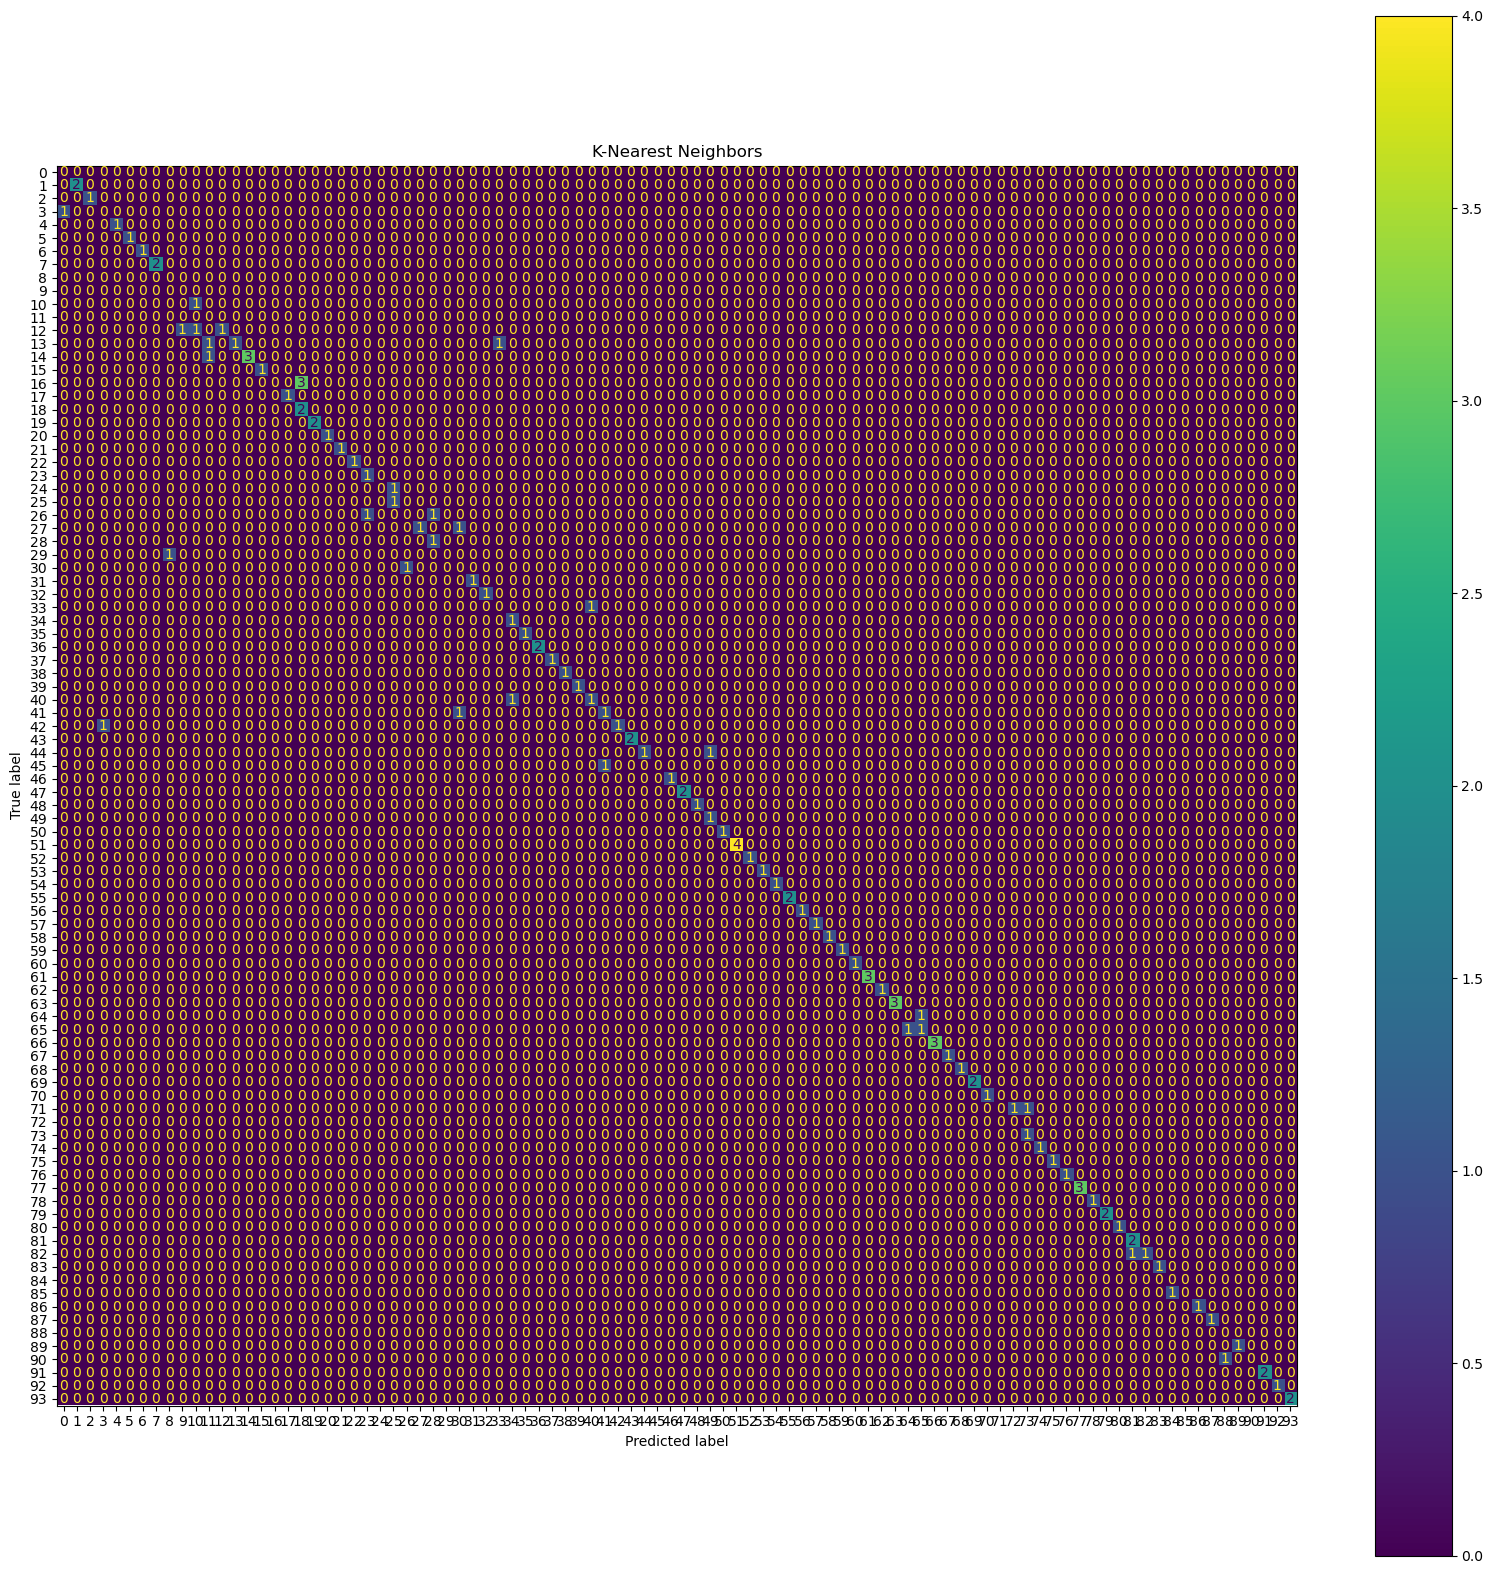

--------------------------------------------------------------
Liner SVM
              precision    recall  f1-score   support

         301       1.00      1.00      1.00         2
         302       0.00      0.00      0.00         0
         303       1.00      1.00      1.00         1
         304       1.00      1.00      1.00         1
        304A       1.00      1.00      1.00         1
        304B       1.00      1.00      1.00         1
         305       1.00      1.00      1.00         1
         308       1.00      1.00      1.00         2
         320       0.00      0.00      0.00         1
         322       1.00      1.00      1.00         3
         323       1.00      1.00      1.00         3
         325       1.00      0.50      0.67         4
        326B       1.00      1.00      1.00         1
         327       1.00      0.67      0.80         3
         328       0.33      1.00      0.50         1
         329       1.00      0.50      0.67         2
        

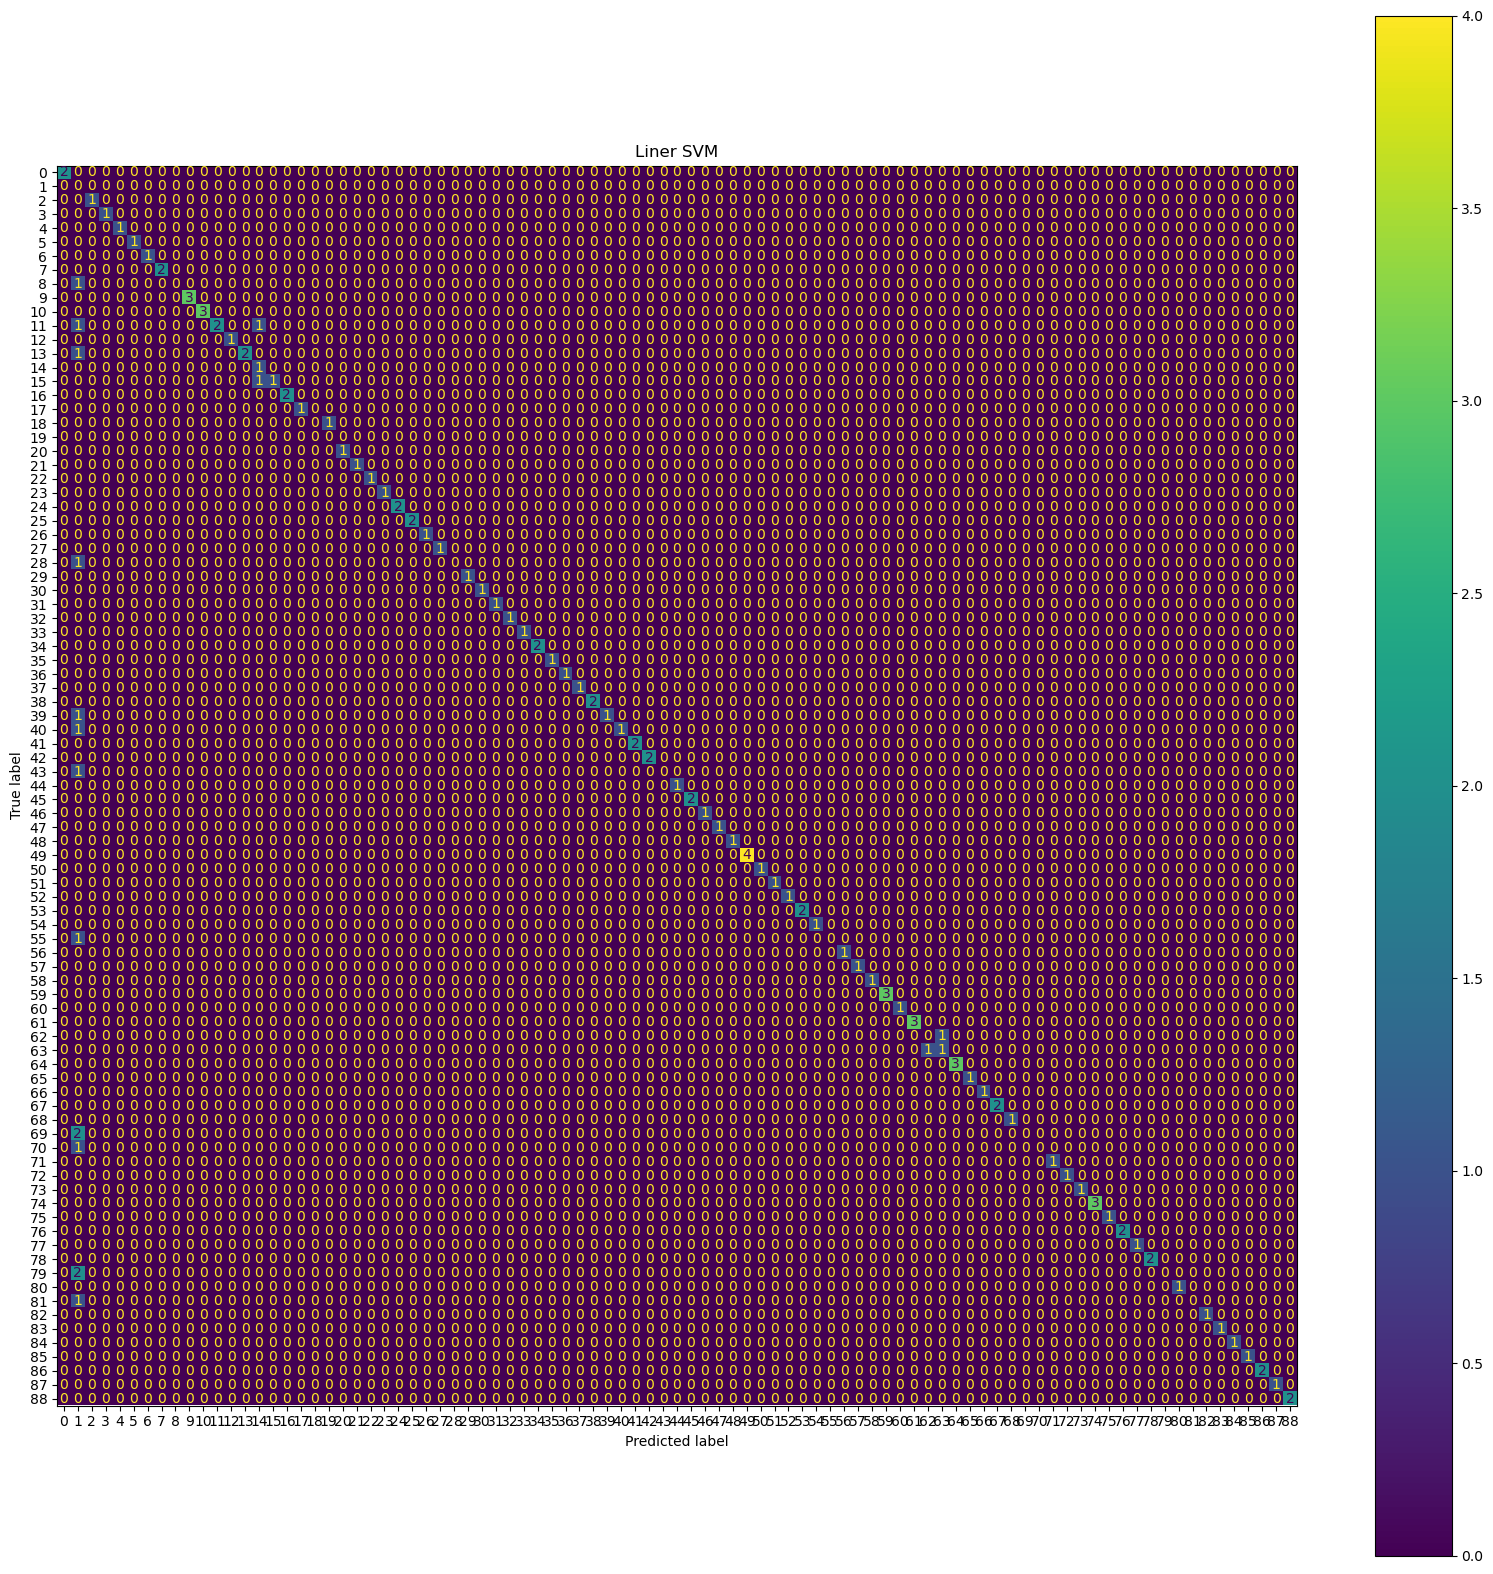

--------------------------------------------------------------
Decision Tree
              precision    recall  f1-score   support

         300       0.00      0.00      0.00         0
         301       0.00      0.00      0.00         2
         303       0.00      0.00      0.00         1
         304       0.00      0.00      0.00         1
        304A       1.00      1.00      1.00         1
        304B       0.00      0.00      0.00         1
         305       0.00      0.00      0.00         1
         308       1.00      1.00      1.00         2
         320       0.00      0.00      0.00         1
         322       0.00      0.00      0.00         3
         323       0.00      0.00      0.00         3
         325       0.00      0.00      0.00         4
        326B       1.00      1.00      1.00         1
         327       0.00      0.00      0.00         3
         328       1.00      1.00      1.00         1
         329       0.00      0.00      0.00         2
    

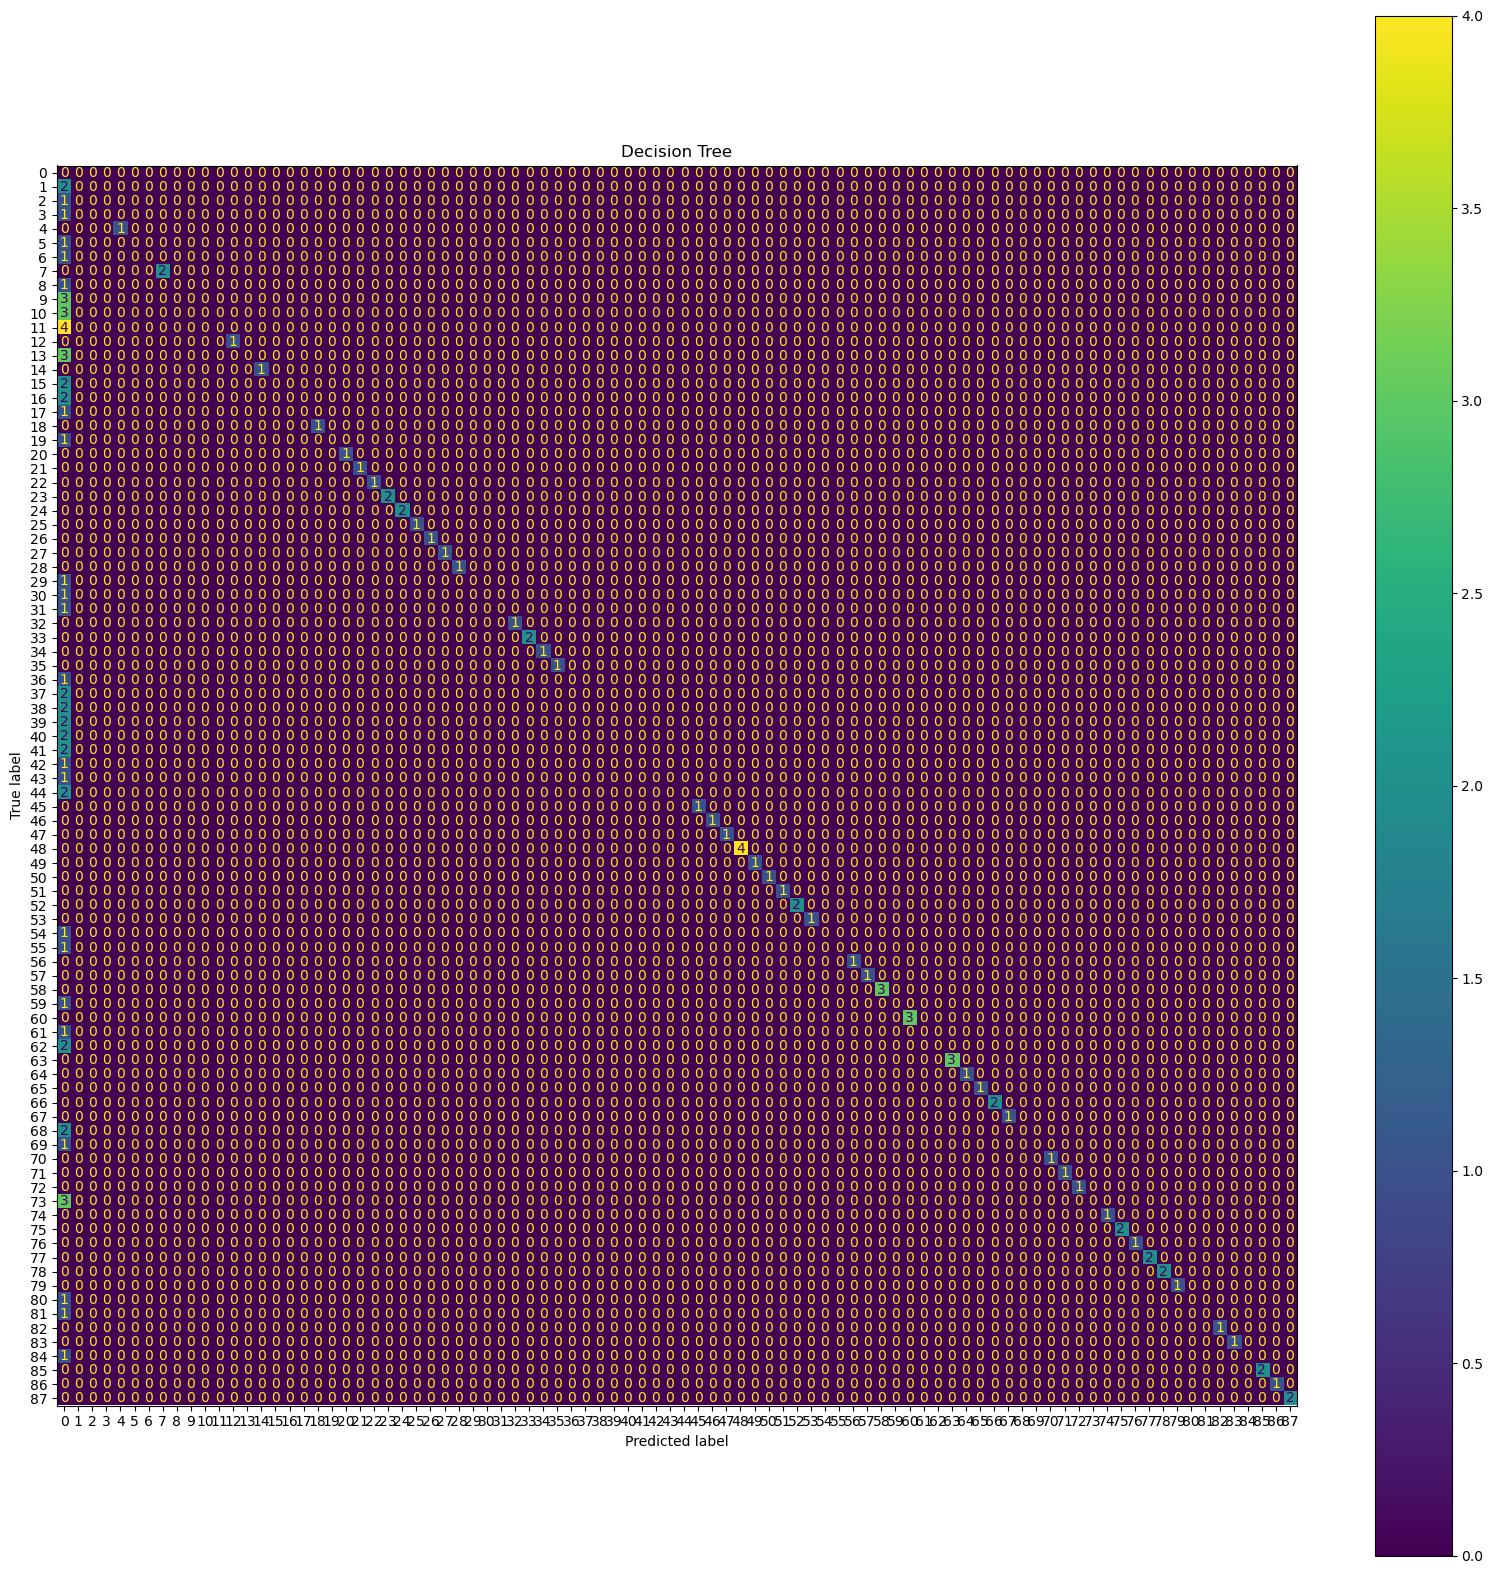

--------------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

         301       0.00      0.00      0.00         2
         303       1.00      1.00      1.00         1
         304       0.00      0.00      0.00         1
        304A       1.00      1.00      1.00         1
        304B       0.25      1.00      0.40         1
         305       1.00      1.00      1.00         1
         307       0.00      0.00      0.00         0
         308       1.00      0.50      0.67         2
         319       0.00      0.00      0.00         0
         320       1.00      1.00      1.00         1
         321       0.00      0.00      0.00         0
         322       1.00      0.33      0.50         3
         323       1.00      0.67      0.80         3
         325       0.75      0.75      0.75         4
        326B       1.00      1.00      1.00         1
         327       1.00      1.00      1.00         3
    

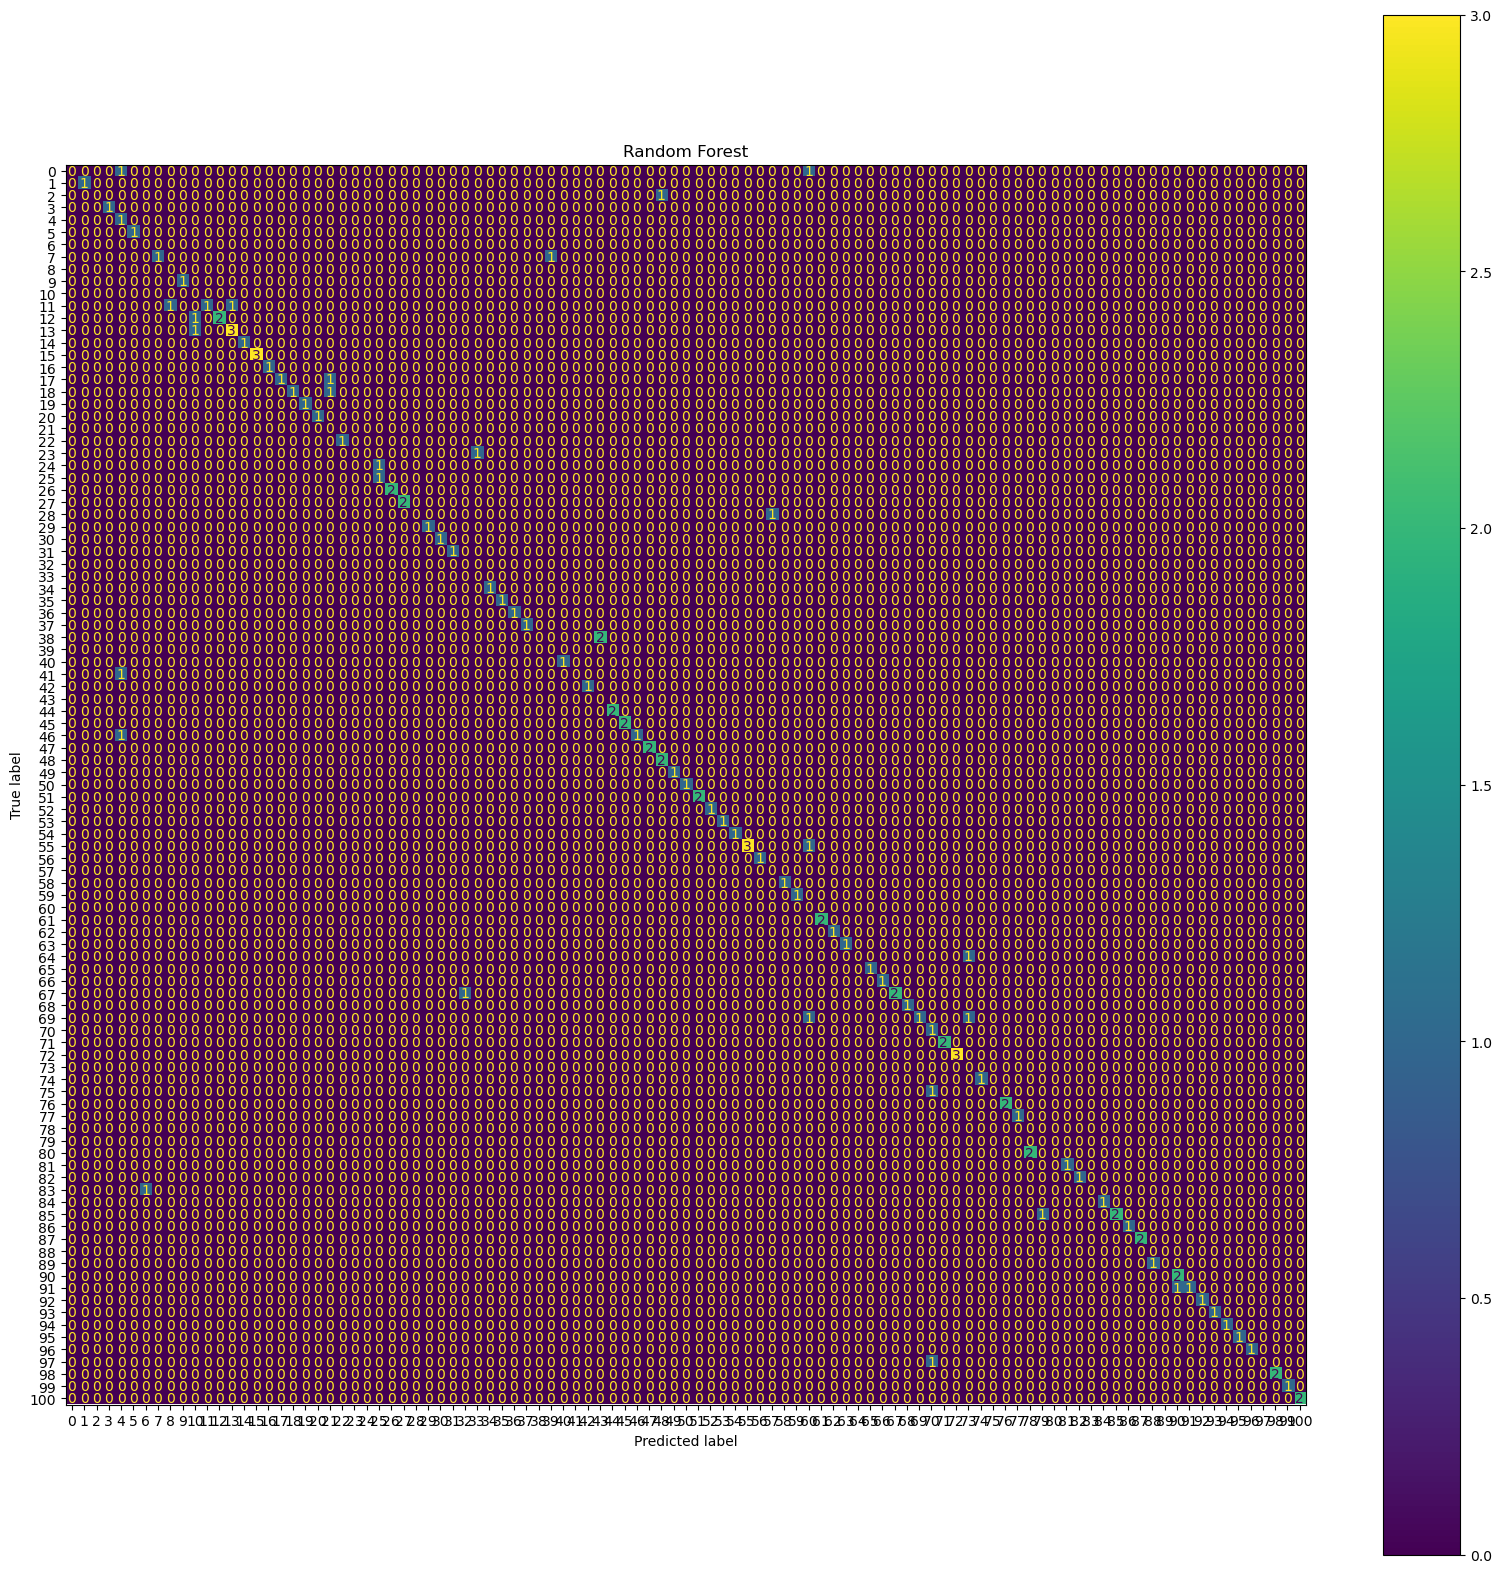

--------------------------------------------------------------
ExtraTreesClassifier
              precision    recall  f1-score   support

         301       1.00      1.00      1.00         2
         303       1.00      1.00      1.00         1
         304       1.00      1.00      1.00         1
        304A       1.00      1.00      1.00         1
        304B       1.00      1.00      1.00         1
         305       1.00      1.00      1.00         1
         308       1.00      1.00      1.00         2
         320       1.00      1.00      1.00         1
         322       1.00      1.00      1.00         3
         323       1.00      1.00      1.00         3
         325       1.00      1.00      1.00         4
        326B       1.00      1.00      1.00         1
         327       1.00      1.00      1.00         3
         328       1.00      1.00      1.00         1
         329       1.00      1.00      1.00         2
         330       1.00      1.00      1.00        

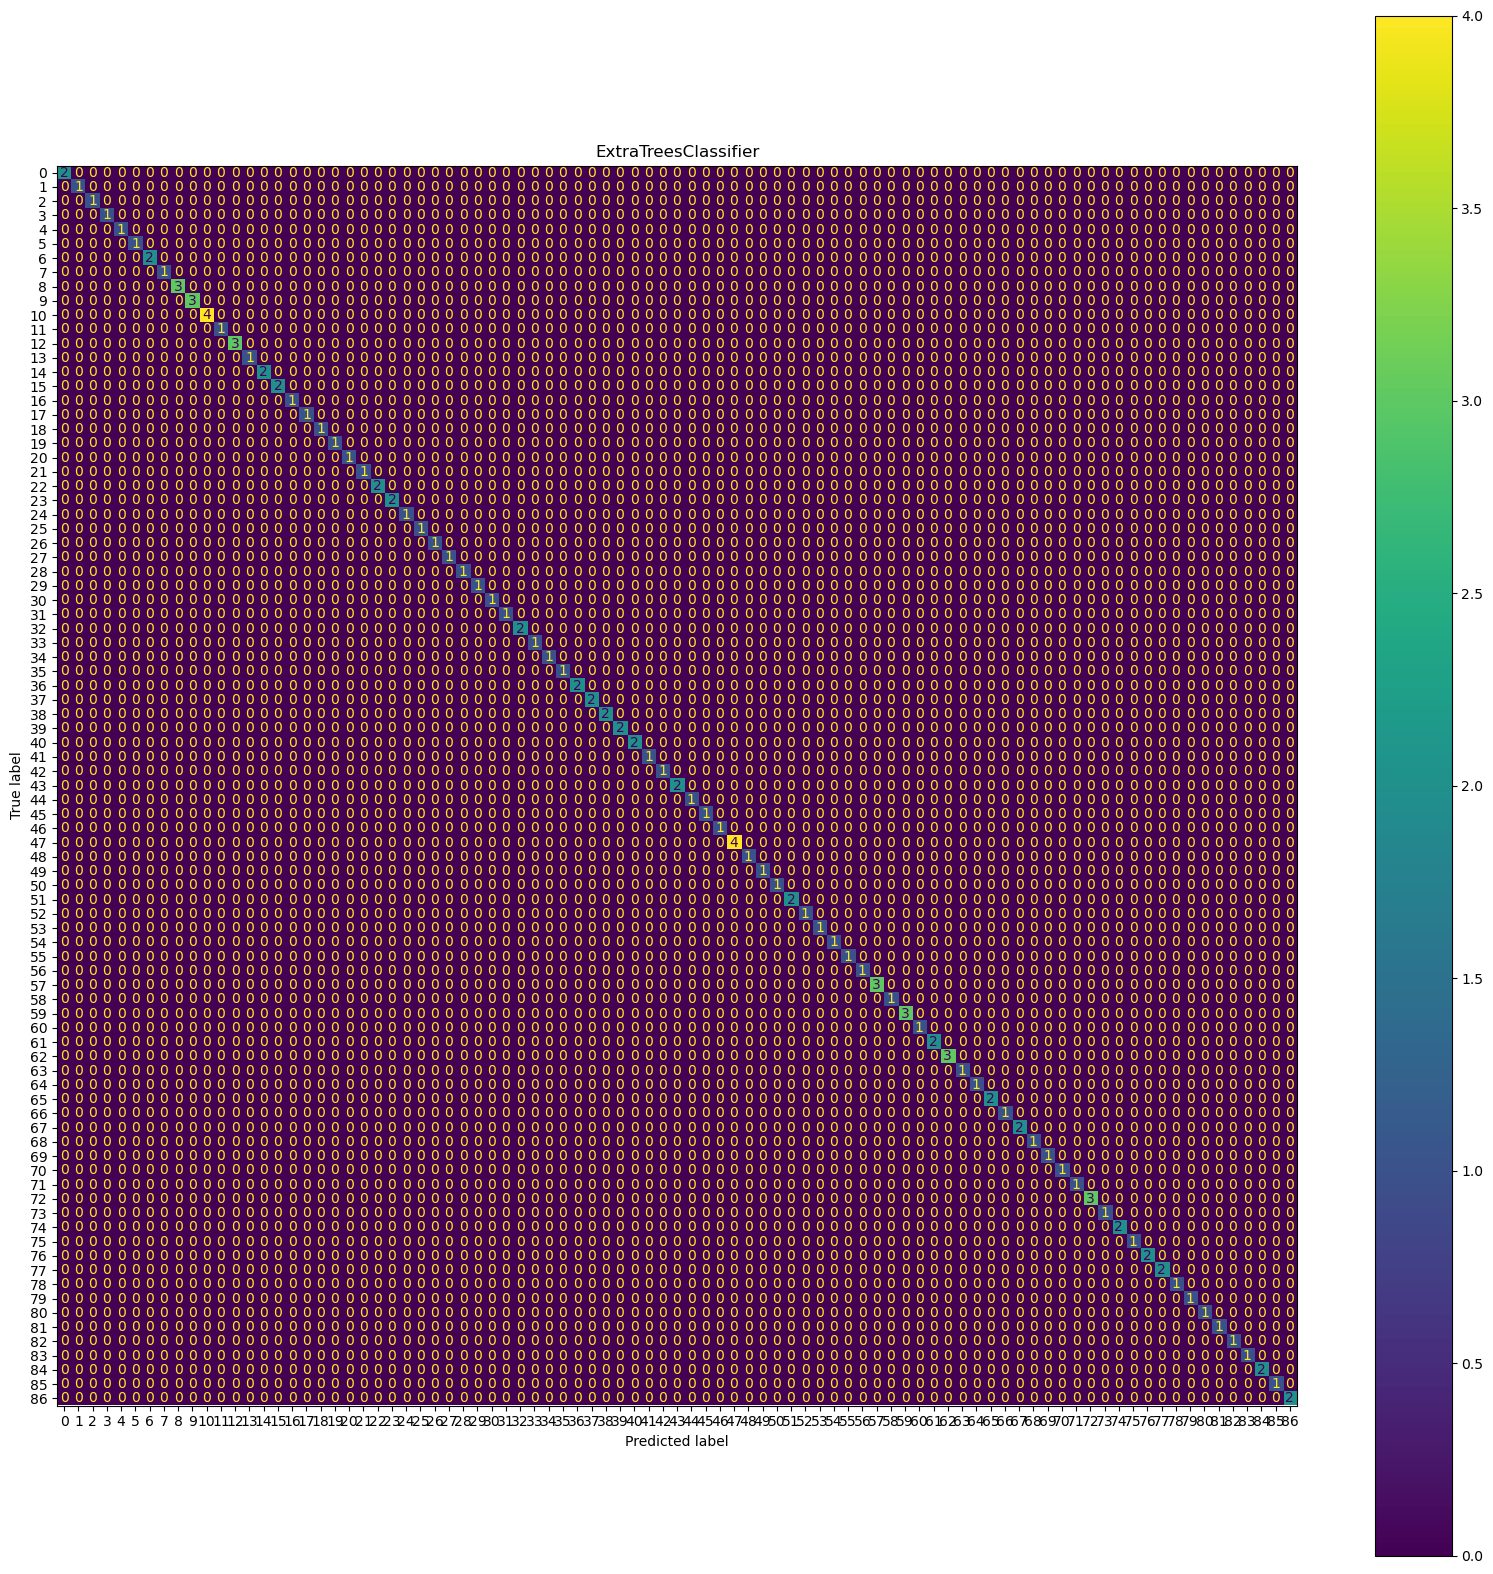

--------------------------------------------------------------


In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
names = ["K-Nearest Neighbors", "Liner SVM",
         "Decision Tree", "Random Forest",
         "ExtraTreesClassifier"]
classifiers = [
    KNeighborsClassifier(),
    LinearSVC(max_iter=1),
    DecisionTreeClassifier(max_depth=50),
    RandomForestClassifier(n_estimators=1),
    ExtraTreesClassifier(n_estimators=1)]
clfF=[]
for name, clf in zip(names, classifiers):
    # Perform classification 
    model = clf
    model.fit(data_vect,labels)
    y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred))
    cmt=confusion_matrix(y_test, y_pred)
    cmp=ConfusionMatrixDisplay(confusion_matrix=cmt)
    fig, ax = plt.subplots(figsize=(20,20))
    cmp.plot(ax=ax)
    plt.title(name)
    plt.show()
    print('--------------------------------------------------------------')
    clfF.append(model)

In [14]:
clfF

[KNeighborsClassifier(),
 LinearSVC(max_iter=1),
 DecisionTreeClassifier(max_depth=50),
 RandomForestClassifier(n_estimators=1),
 ExtraTreesClassifier(n_estimators=1)]

In [15]:
import pickle
import bz2
sfile1 = bz2.BZ2File("All Model", 'w')
pickle.dump(clfF, sfile1) 
sfile2 = bz2.BZ2File("All Vector", 'w')
pickle.dump(vectorizer, sfile2) 